In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from numpy.lib.index_tricks import diag_indices

In [6]:
# spins from -1 to 1

zero = np.array([
0,1,1,1,0,
1,0,0,0,1,
1,0,0,0,1,
1,0,0,0,1,
1,0,0,0,1,
0,1,1,1,0
])

zero = np.where(zero != 0, zero, -1)

one=np.array([
0,1,1,0,0,
0,0,1,0,0,
0,0,1,0,0,
0,0,1,0,0,
0,0,1,0,0,
0,0,1,0,0
])

one = np.where(one != 0, one, -1)

two=np.array([
1,1,1,0,0,
0,0,0,1,0,
0,0,0,1,0,
0,1,1,0,0,
1,0,0,0,0,
1,1,1,1,1,
])

two = np.where(two != 0, two, -1)

noisy0=np.array([
0,1,1,1,0,
1,0,0,0,0,
1,0,0,0,1,
0,0,0,0,0,
0,0,0,0,0,
0,0,1,0,0,
])

noisy0 = np.where(noisy0 != 0, noisy0, -1)

noisy2=np.array([
1,1,1,0,0,
0,0,0,0,0,
0,0,0,0,0,
0,0,1,0,0,
1,0,0,0,0,
1,1,0,0,1,
])

noisy2 = np.where(noisy2 != 0, noisy2, -1)

noisy2b=np.array([
1,1,1,0,0,
0,0,0,1,0,
0,0,0,1,0,
0,0,0,0,0,
0,0,0,0,0,
0,0,0,0,0,
])

noisy2b = np.where(noisy2b != 0, noisy2b, -1)

time_step = 1
noisy0_copy = noisy0

tens0 = np.tensordot(zero, zero, axes = 0)
tens1 = np.tensordot(one, one, axes = 0)
tens2 = np.tensordot(two, two, axes = 0)
tens_sum = tens0 + tens1 + tens2

one_ar = np.ones((30,30))
diag_matrix = np.diag(np.diag(one_ar))

w_matrix = 1/3 * (tens0 + tens1 + tens2) - diag_matrix

energy = np.zeros(diag_matrix.shape)

for t in range(time_step):
    a = np.sum(np.dot(w_matrix, noisy0_copy), axis=0) * noisy0_copy
    energy += -1/2 * a 
    #  energy = np.where(a < 0, energy, 1)
    a_where_lower = a < 0
    noisy0_copy[a_where_lower] = 1

print(noisy0_copy)
print("___________________________________________________")
print(zero)

[-1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1]
___________________________________________________
[-1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1
  1 -1  1  1  1 -1]


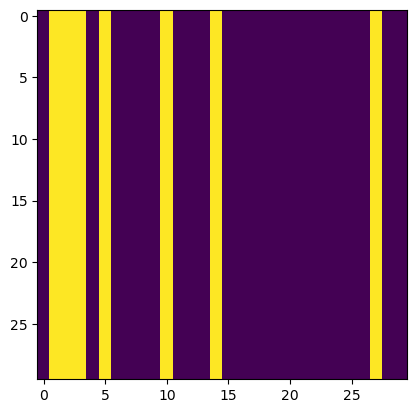

In [3]:
plt.imshow(energy)
plt.show()